#Diabetes
dataset de clsificacion para predecir la diabestes de un paciente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial 1/Examen 1/diabetes_data.csv")
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
# Calcular la cantidad de valores diferentes en una co
valores = data['Diabetes'].unique()
print(valores)

[0. 1.]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Separamos los datos- Caracteristicas "**X**" y  Variable objetivo "**y**" para usarlo mas adelante

In [ ]:
# Extrae la columna 'Diabetes' y la asigna a la variable y
y = data['Diabetes'].values
# Elimina la columna 'Diabetes' de la matriz X
X = data.drop(columns=['Diabetes']).values

In [ ]:
# Verificar si hay valores vacíos o nulos en la variable X
nulos_X = np.isnan(X).sum()
nulos_y = np.isnan(y).sum()

print('nulos en X:\n',nulos_X)
print('nulos en y:\n',nulos_y)

nulos en X:
 0
nulos en y:
 0


## **Calaculos**


# Funcion de la Sigmoide

In [ ]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

agregamos la una primera columna de unos

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
#Revisamos
X

array([[ 1.,  4.,  1., ...,  0.,  0.,  1.],
       [ 1., 12.,  1., ...,  0.,  1.,  1.],
       [ 1., 13.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 13.,  0., ...,  1.,  0.,  1.],
       [ 1., 11.,  0., ...,  1.,  0.,  1.],
       [ 1.,  9.,  0., ...,  0.,  0.,  1.]])

## Normalizamos
nota: siempre normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

In [ ]:
# Revisamos
X_norm

array([[ 0.        , -1.60723742,  1.09004602, ..., -0.58155367,
        -0.25747348,  0.88020109],
       [ 0.        ,  1.19768093,  1.09004602, ..., -0.58155367,
         3.88389516,  0.88020109],
       [ 0.        ,  1.54829572,  1.09004602, ..., -0.58155367,
        -0.25747348, -1.13610402],
       ...,
       [ 0.        ,  1.54829572, -0.91739246, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.        ,  0.84706614, -0.91739246, ...,  1.71953175,
        -0.25747348,  0.88020109],
       [ 0.        ,  0.14583655, -0.91739246, ..., -0.58155367,
        -0.25747348,  0.88020109]])

# Funcion Costo Gradiente

# Funcion de costo en una regresion logistica

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
def calcularCostoR(theta, X, y, lambda_):
    m = y.size
    h = calcularSigmoide(X.dot(theta.T))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term
    return J

# Funcion de Descenso por el Gradiente

La REGULARIZACION SOLO CAMBIA LA FUNCION DE COSTO

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
def descensoGradienteR(theta, X, y, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        reg_term = (lambda_ / m) * theta[1:]
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] * (1 - alpha * (lambda_ / m)) - (alpha / m) * (h - y).dot(X[:, 1:])
        theta[1:] = theta[1:] - reg_term
        J_history.append(calcularCostoR(theta, X, y, lambda_))
    return theta, J_history

Separar el 80% de los datos para entrenamiento y el 20% para hacer las pruebas

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Configuracion de Hiperparametros para el entrenamiento del Modelo

theta calculado por el descenso por el gradiente: 
 [ 0.          0.34123209  0.0870946   0.27856956  0.15494846  0.40950604
  0.01863528  0.13011844 -0.05381833 -0.03189549 -0.05512667 -0.13925133
  0.47978427 -0.02199229  0.03152947  0.13221459  0.05242534  0.39315152]


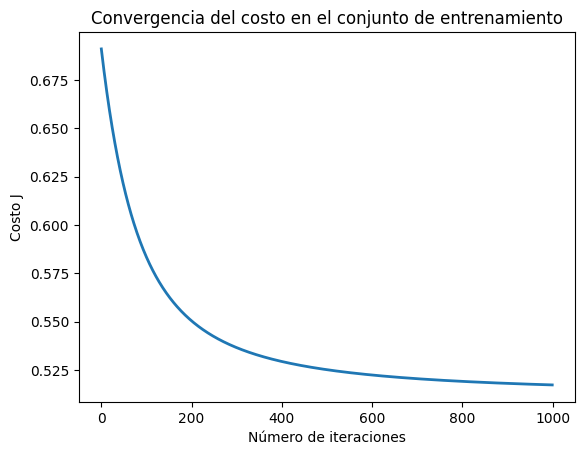

con un costo de: 0.5172119440661004 


In [ ]:
# Configurar hiperparámetros y realizar descenso por el gradiente en el conjunto de entrenamiento
alpha = 0.01
num_iters = 1000       #con 500 iteraciones ya tenemos una buena convergencia
lambda_= 50
theta = np.zeros(18)

theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

#theta, J_history = descensoGradienteR(theta, X_train, y_train, alpha,lambda_, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: \n',(theta))


# Graficar la convergencia del costo en el conjunto de entrenamiento
pyplot.plot(np.arange(len(J_history)), (J_history), lw=2)

pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo en el conjunto de entrenamiento')
pyplot.show()

print(f"con un costo de: { J_history[-1]} ")

In [ ]:
#Revisamos las dimensiones de X_normalizada
print(X_norm.shape)

(70692, 18)


In [ ]:
#Revisamos las dimensiones de Theta
tita = pd.DataFrame(theta)
print(tita.shape)

(18, 1)


# Funcion para calcular la precision de las predicciones

In [ ]:
def calcularPrecision(predictions, labels):
    # Convertir predicciones a etiquetas binarias (0 o 1)
    predictions_binary = (predictions >= 0.5).astype(int)

    # Calcular la precisión
    correct_predictions = np.sum(predictions_binary == labels)
    total_examples = len(labels)
    precision = correct_predictions / total_examples

    return precision

Y por ultimo Hacemos las predicciones con el otro 20% de datos faltantes para la evaluacion del Modelo

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_train, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_entrenamiento = calcularPrecision(y_predicha, y_train)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_train)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_train)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de entrenamiento:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_entrenamiento:.2%}')

Resultados en el conjunto de entrenamiento:
Número total de predicciones correctas: 42250
Número total de predicciones incorrectas: 14303
Porcentaje de precisión: 74.71%


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_test, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_test = calcularPrecision(y_predicha, y_test)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_test)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_test)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de prueba:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_test:.2%}')

Resultados en el conjunto de prueba:
Número total de predicciones correctas: 10506
Número total de predicciones incorrectas: 3633
Porcentaje de precisión: 74.31%
